<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Web-Scraping" data-toc-modified-id="Web-Scraping-1">Web Scraping</a></span><ul class="toc-item"><li><span><a href="#1.-Import-libraries" data-toc-modified-id="1.-Import-libraries-1.1">1. Import libraries</a></span></li><li><span><a href="#2.First-attempt:-Web-scraping-with-Selenium" data-toc-modified-id="2.First-attempt:-Web-scraping-with-Selenium-1.2">2.First attempt: Web scraping with Selenium</a></span></li><li><span><a href="#3.Second-attempt:-Web-scapping-with-Beatufiul-Soup-and-Selenium" data-toc-modified-id="3.Second-attempt:-Web-scapping-with-Beatufiul-Soup-and-Selenium-1.3">3.Second attempt: Web scapping with Beatufiul Soup and Selenium</a></span></li></ul></li></ul></div>

# Web Scraping

We are going to do web scrapping on the Tripadvisor website to get the reviews from a restaurant. 

First, we will start with one restaurant(De kas) and if we have more time, will gather more information from more.

The purpose is to get a csv file with the reviews and other atrributes to be able to do a NLP (Natural Language processing) analysis with the reviews. 


Having a firts look at the site, we would like to extract:

    - Review Score
    - Title of the review
    - Review text
    - Date
    

I tried first with  BeautifulSoup and realized that is not enough, as when you are on the reviews you should press the more link to see the whole review, and not just the first lines. 
We need to launch a browser and control using Selenium, to simulate pressing the More link and executing the JavaScript code.

Another problem is that the score is graphical, with 5 green circles. We will need to expect further. 

In [5]:
#!pip install selenium

## 1. Import libraries

In [1]:
import csv
import time
from selenium import webdriver
import pandas as pd
import re
from bs4 import BeautifulSoup

## 2.First attempt: Web scraping with Selenium 

We could build a pandas data frame using each element as a key in a dictionary and a list as the values that we have obtain by scrapping. 

Anohter way is to use the library csv to create a csv file directly.

In [327]:
# Prepare an empty CSV file
csvFile = open("kas_reviews_2.csv", "w", newline='', encoding="utf-8")
csvWriter = csv.writer(csvFile)
csvWriter.writerow(['Score','Date','Title','Review'])

25

This is the url we would like to scrap.

In [2]:
#1.First page
url = "https://www.tripadvisor.com/Restaurant_Review-g188590-d696917-Reviews-De_Kas-Amsterdam_North_Holland_Province.html"



We need to create a list for all the urls to get the reviews. 
The are 10 reviews displaied on each time. The first url in on the varialbe url. The rest we will create and store them on a list to iterate over it later on while scrapping. 

What it changes between url's, after the ifrst one is this part: -or10-, -or20-, etc.

There are around 1308 in english. The number on the url that changes displays the total number of reviews already seen in the previous URL's.

In [3]:
#range from 10 to 10, till the 1308 displayed.
numbers = list(range(10,1310, 10))

In [4]:
list_urls = [url]
for number in numbers:
    url_page= "https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or" + str(number) + "-De_Kas-Amsterdam_North_Holland_Province.html"
    list_urls.append(url_page)

In [5]:
len(list_urls)

131

In [ ]:
#2. we need to install webdriver.
#The Selenium API uses the WebDriver protocol to control a web browser

In [330]:
driver = webdriver.Chrome('/Users/lauratll/Documents/Data_Analysis/IronHack/Week_8/chromedriver')  

In [7]:
from time import sleep
from random import randint


We will loop through the urls, to gatter the information.
Once we are on the url, we need to click to see the whole review in the reviews section.
We will create some waiting time to not overload the requests of information while changing url and while gattering all the reviews from one url.

We will use a try and expect just in case an error is found while parsing, to jump to the next review.



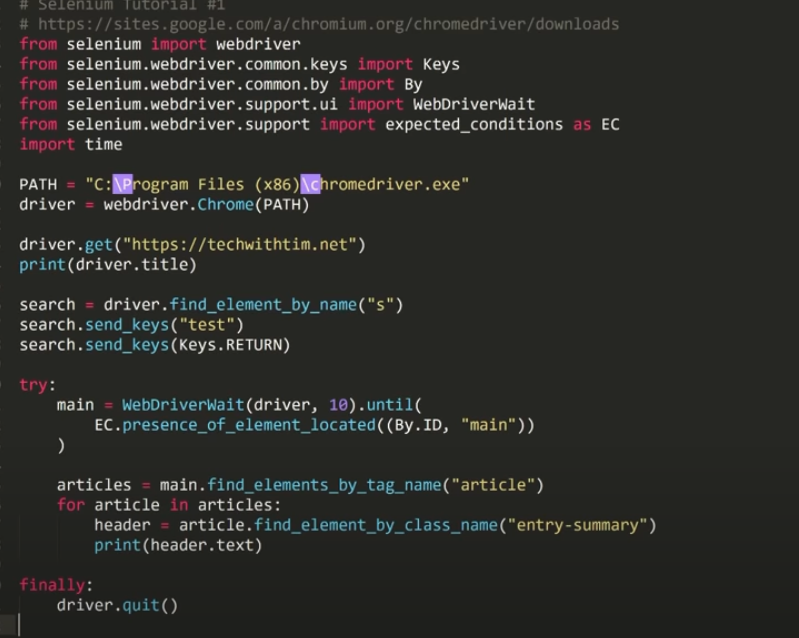

In [ ]:
# Prepare an empty CSV file
csvFile = open("kas_reviews_2.csv", "w", newline='', encoding="utf-8")
csvWriter = csv.writer(csvFile)
csvWriter.writerow(['Score','Date','Title','Review'])

In [117]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [153]:
# driver.get(url)
# #select language
# driver.find_element_by_xpath("""//*[@id="taplc_detail_filters_rr_resp_0"]/div/div[1]/div/div[2]/div[4]/div/div[2]/div[1]/div[3]/label/span[1]""").click()
# time.sleep(5)
# #expand reviews
# driver.find_element_by_xpath("//span[@class='taLnk ulBlueLinks']").click()
# #select review boxes
# main= driver.find_element_by_xpath("//div[@class='reviewSelector']")




In [149]:
#language button
driver.find_element_by_xpath("""//*[@id="taplc_detail_filters_rr_resp_0"]/div/div[1]/div/div[2]/div[4]/div/div[2]/div[1]/div[3]/label/span[1]""").click()

In [127]:
# driver.get(url)
# try:
#     WebDriverWait(driver, 10).until(EC.element_to_be_clickable
#                                     ((By.XPATH,"""//*[@id="_evidon-accept-button"]"""))).click()
# except:
#     pass
# WebDriverWait(driver, 10).until(EC.element_to_be_clickable
#                                     ((By.XPATH,"""//*[@id="review_770692986"]/div/div[2]/div[3]/div/p/span"""))).click()

TimeoutException: Message: 


In [353]:
# Prepare an empty CSV file
csvFile = open("kas_reviews_2.csv", "w", newline='', encoding="utf-8")
csvWriter = csv.writer(csvFile)
csvWriter.writerow(['Id','Score','Date','Title','Review'])

28

In [351]:
driver = webdriver.Chrome('/Users/lauratll/Documents/Data_Analysis/IronHack/Week_8/chromedriver')  

In [15]:
#good one, no possible implementation of the id

#Prepare an empty CSV file
csvFile = open("kas_reviews_2.csv", "w", newline='', encoding="utf-8")
csvWriter = csv.writer(csvFile)
csvWriter.writerow(['Id','Score','Date','Title','Review'])

driver = webdriver.Chrome('/Users/lauratll/Documents/Data_Analysis/IronHack/Week_8/chromedriver')  

for url in list_urls:
    driver.get(url)
     # Find and click the More link (to load all reviews). We jus need to click the first to be able to see
    #the rest as well
    time.sleep(3)
#     try:
    driver.find_element_by_xpath("//span[@class='taLnk ulBlueLinks']").click()
#     except "StaleElementReferenceException":
#         continue
    print(url)
    time.sleep(3) # Wait for reviews to load
    
    #creates a list with all the reviews acesses
    #reviews = driver.find_elements_by_xpath("//div[@class='ui_column is-9']")
    
    reviews = driver.find_elements_by_xpath("//div[@class='review-container']")
    #iterate over each element
    num_page_items = len(reviews)
    # Loop through the reviews found
    for i in range(num_page_items):
        # get the score, date, title and review
        ids = reviews[i].find_element_by_xpath(".//div[@class='reviewSelector']").get_attribute("data-reviewid")
            
        score_class = reviews[i].find_element_by_xpath(".//span[contains(@class, 'ui_bubble_rating bubble_')]").get_attribute("class")
        score = score_class.split("_")[3]
            
        date = reviews[i].find_element_by_xpath(".//span[@class='ratingDate']").get_attribute("title")
            
        title = reviews[i].find_element_by_xpath(".//span[@class='noQuotes']").text
            
        review = reviews[i].find_element_by_xpath(".//p[@class='partial_entry']").text.replace("\n", "")
            
            # Save to CSV
        csvWriter.writerow((ids,score, date, title, review))

        # Close CSV file and browser
csvFile.close()
driver.close()
        

https://www.tripadvisor.com/Restaurant_Review-g188590-d696917-Reviews-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or10-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or20-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or30-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or40-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or50-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or60-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or70-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant

https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or680-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or690-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or700-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or710-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or720-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or730-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or740-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or750-De_Kas-Amsterdam_North_Holland_Province.html
https://www.tripadvisor.

In [12]:
csvFile.close()
driver.close()

MaxRetryError: HTTPConnectionPool(host='127.0.0.1', port=52866): Max retries exceeded with url: /session/0426621944455a86e0afeebd63fb54f8/window (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fd9700d3ac0>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [ ]:
kas = pd.read_csv("kas_reviews_2.csv")

In [10]:
kas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      131 non-null    int64 
 1   Score   131 non-null    int64 
 2   Date    131 non-null    object
 3   Title   131 non-null    object
 4   Review  131 non-null    object
dtypes: int64(2), object(3)
memory usage: 5.2+ KB


## 3.Second attempt: Web scapping with Beatufiul Soup and Selenium 

In [161]:
from bs4 import BeautifulSoup

In [303]:
review_id_list= []
scores_over50_list= []
dates_list = []
titles_list=[]
reviews_list = []

for url in list_urls:
    options = webdriver.ChromeOptions()
    browser = webdriver.Chrome('/Users/lauratll/Documents/Data_Analysis/IronHack/Week_8/chromedriver') 
    print("Current session is {}".format(browser.session_id))
    browser.get(url)
    time.sleep(3)
    browser.find_element_by_xpath("//*[@id='_evidon-accept-button']").click()
    time.sleep(3)
    browser.find_element_by_xpath("//span[@class='taLnk ulBlueLinks']").click()
    print(url)
    time.sleep(3)
    source = browser.page_source    
    soup = BeautifulSoup(source, features = "lxml")
    browser.close()
    for tag in soup.select("#taplc_location_reviews_list_resp_rr_resp_0 > div >div > div > div > div  "):
        if tag.get('data-reviewid') != None:
            review_id_list.append(tag.get('data-reviewid'))
        for date in tag.find_all(class_="ratingDate"):
            dates_list.append(date.get('title'))
        for title in tag.find_all(class_="noQuotes"):
            titles_list.append(title.text)
        for review in tag.find_all(class_="partial_entry"):
            reviews_list.append(review.text.replace("\n", ""))
        for score in tag.find_all("span",attrs={'class': re.compile('ui_bubble_rating bubble_')}):
            indiv_score= score.get('class')[1].split("_")[1]
            scores_over50_list.append(indiv_score)
        


Current session is fee93e6ab852c860a260fa1092283a16
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917-Reviews-De_Kas-Amsterdam_North_Holland_Province.html
Current session is d1f34d49ddeb399515147aeab5f20f83
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or10-De_Kas-Amsterdam_North_Holland_Province.html
Current session is 68a0554f5e1a0b32c039943533e933a9
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or20-De_Kas-Amsterdam_North_Holland_Province.html
Current session is 78b2732f20eb95c5bf84ab9e0514c8f5
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or30-De_Kas-Amsterdam_North_Holland_Province.html
Current session is 56ecbdcbfe1a7c2d46be813fa5567116
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or40-De_Kas-Amsterdam_North_Holland_Province.html
Current session is 3c501f856dc297f0d41d892a89a08543
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or50-De_Kas-Amster

https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or470-De_Kas-Amsterdam_North_Holland_Province.html
Current session is 614a546b86cb1fbad790438653393421
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or480-De_Kas-Amsterdam_North_Holland_Province.html
Current session is 6313bc168e014bf6812b89f6302f8e4d
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or490-De_Kas-Amsterdam_North_Holland_Province.html
Current session is 91ed9381ebdfb7d67f6a2d41f704ab05
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or500-De_Kas-Amsterdam_North_Holland_Province.html
Current session is 3a43f1ae2bc85221c7a26f0f3806e654
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or510-De_Kas-Amsterdam_North_Holland_Province.html
Current session is 0054b2fd764e806e0b88bc2ca99f0b27
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or520-De_Kas-Amsterdam_North_Holland_Province.html
Current 

Current session is a58f954e77525d2c0442312838788d63
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or950-De_Kas-Amsterdam_North_Holland_Province.html
Current session is 84e4c7990ad08443b1f21f94430d1b26
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or960-De_Kas-Amsterdam_North_Holland_Province.html
Current session is 26e304dec529d6516fa682155637dcf9
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or970-De_Kas-Amsterdam_North_Holland_Province.html
Current session is 5bb1e190bd6981b09afce6d6062c38ad
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or980-De_Kas-Amsterdam_North_Holland_Province.html
Current session is 49c5fafc07f142cbc2a78afbc90bdfcf
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or990-De_Kas-Amsterdam_North_Holland_Province.html
Current session is 236dd4503164f2329261607f116f75c3
https://www.tripadvisor.com/Restaurant_Review-g188590-d696917--Reviews-or1000-

In [308]:
kas_df= pd.DataFrame({"ID":review_id_list,"Score":scores_over50_list,"Date":dates_list,"Title":titles_list,"Review":reviews_list} )

ValueError: arrays must all be same length

In [314]:
len(reviews_list)

1535

In [ ]:
review_id_list
scores_over50_list
dates_list
titles_list
reviews_list